In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tweepy

In [3]:
from tweepy import OAuthHandler

In [4]:
from textblob import TextBlob

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [6]:
consumer_key="******************************"
consumer_secret="****************************"
access_token="***********************************"
access_secret="**************************************" 

In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [8]:
api = tweepy.API(auth)

In [9]:
fetched_tweets = api.search(q = 'NRC', count = 400,ln='en') 

In [10]:
tweet_df=pd.DataFrame(columns=["text"])
tweets = [] 
tweetdate=[]
# parsing tweets one by one 
for tweet in fetched_tweets: 
        tweets_text = tweet.text 
        tweets_date = tweet.created_at
      # appending parsed tweet to tweets list 
        tweets.append(tweets_text) 
        tweetdate.append(tweets_date) 

In [11]:
tweet_df["text"]=tweets
tweet_df["created_at"]=tweets

In [12]:
tweet_df

,text,created_at
0,RT @BhaiDesibhai10: यह देखो #शाहीन_बाग प्रदर्श...,RT @BhaiDesibhai10: यह देखो #शाहीन_बाग प्रदर्श...
1,RT @ziddi_jamura: योगी के रामराज के बनारस में ...,RT @ziddi_jamura: योगी के रामराज के बनारस में ...
2,70 वर्षों में इसकी जरूरत और अहमियत को क्यों नह...,70 वर्षों में इसकी जरूरत और अहमियत को क्यों नह...
3,RT @piyushtofficial: हे अल्लाह अब्दुल कहता है ...,RT @piyushtofficial: हे अल्लाह अब्दुल कहता है ...
4,RT @imMAK02: Listen to this Dadi. \n\nShe repl...,RT @imMAK02: Listen to this Dadi. \n\nShe repl...
...,...,...
95,मासूम भक्तों तुमको भी ऐसे #नागरिकता नहीं मिलेग...,मासूम भक्तों तुमको भी ऐसे #नागरिकता नहीं मिलेग...
96,RT @ThePeopleOfIN: चप्पा चप्पा गूँज रहा है इंक...,RT @ThePeopleOfIN: चप्पा चप्पा गूँज रहा है इंक...
97,RT @AcharyaPramodk: मोहन भागवत बार बार कहते है...,RT @AcharyaPramodk: मोहन भागवत बार बार कहते है...
98,@i_theindian Who says that Hindus will not suf...,@i_theindian Who says that Hindus will not suf...


In [13]:
tweet_df.loc[1,'text']

'RT @ziddi_jamura: योगी के रामराज के बनारस में लगे इस पोस्टर देखिए।\n\nअभी से ही आ गए ये अपनी औकात पर, सरकार की मन की वो बात जो पर्दे के पीछे…'

In [14]:
tweet_df.shape

(100, 2)

In [15]:
tweet_df.isnull().sum()

text          0
created_at    0
dtype: int64

In [16]:
tweet_df["text"]=pd.DataFrame(tweet_df["text"].unique())

In [17]:
tweet_df.shape

(100, 2)

In [29]:
tweet_df1=tweet_df
tweet_df1['text']=tweet_df['text'].str.replace('NRC','')
tweet_df1['text']=tweet_df['text'].str.replace('CAA','')
tweet_df1['text']=tweet_df['text'].str.replace('RT','')
tweet_df1['text']=tweet_df['text'].str.replace('https','')

In [36]:
stopwords = set(STOPWORDS) 

In [31]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
all_words = ' '.join([str(text) for text in tweet_df1['text']])

In [33]:
all_words=re.sub('NRC','',all_words,re.IGNORECASE)

In [34]:
wordcloud = WordCloud(width=800, height=500, random_state=21,background_color="red", max_font_size=110).generate(all_words)

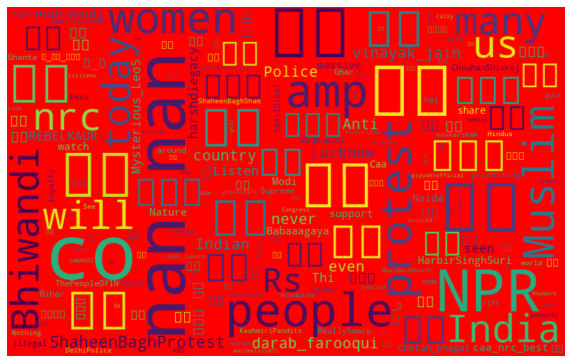

In [35]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
df_sent=tweet_df1
count=0

In [51]:
df = tweet_df1["text"].astype(str) #it should be string

In [52]:
df

0      @BhaiDesibhai10: यह देखो #शाहीन_बाग प्रदर्शन ...
1      @ziddi_jamura: योगी के रामराज के बनारस में लग...
2     70 वर्षों में इसकी जरूरत और अहमियत को क्यों नह...
3      @piyushtofficial: हे अल्लाह अब्दुल कहता है कि...
4      @imMAK02: Listen to this Dadi. \n\nShe replie...
                            ...                        
95                                                  nan
96                                                  nan
97                                                  nan
98                                                  nan
99                                                  nan
Name: text, Length: 100, dtype: object

In [53]:
for i in df:
    analysis = TextBlob(df[count]).sentiment.polarity
    
    #print(analysis.sentiment.polarity)
    df_sent.loc[count,"Sentiment"]=analysis
    count=count+1

In [54]:
df_sent.head()

,text,created_at,Sentiment
0,@BhaiDesibhai10: यह देखो #शाहीन_बाग प्रदर्शन ...,RT @BhaiDesibhai10: यह देखो #शाहीन_बाग प्रदर्श...,0.000
1,@ziddi_jamura: योगी के रामराज के बनारस में लग...,RT @ziddi_jamura: योगी के रामराज के बनारस में ...,0.000
2,70 वर्षों में इसकी जरूरत और अहमियत को क्यों नह...,70 वर्षों में इसकी जरूरत और अहमियत को क्यों नह...,-0.125
3,@piyushtofficial: हे अल्लाह अब्दुल कहता है कि...,RT @piyushtofficial: हे अल्लाह अब्दुल कहता है ...,0.000
4,@imMAK02: Listen to this Dadi. \n\nShe replie...,RT @imMAK02: Listen to this Dadi. \n\nShe repl...,0.000


In [55]:
np.mean(df_sent["Sentiment"])

0.03237518037518037